In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Normal samples

<font size=5>
    T-test with unequal vars. <br>
    $H_0: \mu_1 = \mu_2$ <br>
    $H_1: \mu_1 \ne \mu_2 (<>) $
</font>

In [2]:
# generate 2 samples
n1 = 100
mu1 = 5
sigma1 = 4
X1 = np.random.randn(n1) * sigma1 + mu1

n2 = 80
mu2 = 3.5
sigma2 = 3
X2 = np.random.randn(n2) * sigma2 + mu2

In [3]:
stats.ttest_ind(X1, X2)

Ttest_indResult(statistic=2.3950972562278445, pvalue=0.01765363255935624)

# Binomial samples

<font size=5>
    Z-test. <br>
    $H_0: p_1 = p_2$ <br>
    $H_1: p_1 \ne p_2 (<>) $
</font>

In [4]:
# generate obs. data
n2 = 502
n1 = 480

k2 = 30
k1 = 14

In [5]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([k1, k2])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs, alternative='smaller')

print(f'Z-statistic and p-value:\n {stat} {pval}')

Z-statistic and p-value:
 -2.3165455053868 0.010264251422305417


<font size=5>
    Fisher exact test. <br>
    $H_0: p_1 = p_2$ <br>
    $H_1: p_1 \ne p_2 (<>) $
</font>

In [6]:
table = [[     k1,      k2],
         [n1 - k1, n2 - k2]]

table = np.array(table)

stat, pval = stats.fisher_exact(table, alternative='less')
print(f'p-value: {pval}')

p-value: 0.014608660006249507


# Poisson samples

In [7]:
# generate obs. data
n1 = 100
n2 = 80
lam1 = 3
lam2 = 2


X1 = np.random.poisson(lam1, n1)
X2 = np.random.poisson(lam2, n2)

k1 = X1.sum()
k2 = X2.sum()

<AxesSubplot:ylabel='Count'>

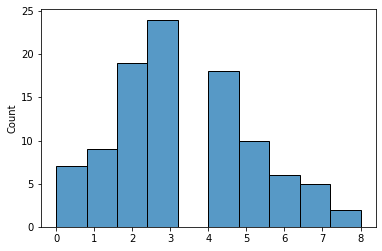

In [8]:
sns.histplot(X1)

<font size=5>
    C-test. <br>
    $H_0: \lambda_1=\lambda_2$ <br>
    $H_1: \lambda_1 \ne \lambda_2 (<>)$
</font>

In [9]:
p = (n1 / n2) / (1 + (n1 / n2))
print(f'Binomial parameter p = {p}')

Binomial parameter p = 0.5555555555555556


In [10]:
from scipy.special import binom
k = k1 + k2

p_val = 0
for i in range(k1, k + 1):
    p_val += binom(k, i) * p ** i *(1 - p) ** (k - i)
print(f'One-tailed p-value: {p_val}')

One-tailed p-value: 7.095292289435953e-08


In [11]:
right = 1- stats.binom.cdf(k1 - 1, k, p)
left = stats.binom.cdf(k1, k, p)
print(f'Two-tailed p-value: {2 * min(right, left)}')

Two-tailed p-value: 1.4190584574080845e-07


<font size=5>
    E-test. <br>
    $H_0: \lambda_1=\lambda_2$ <br>
    $H_1: \lambda_1 \ne \lambda_2 (<>)$
</font>

In [12]:
from poisson_etest import poisson_etest

p_val = poisson_etest(k1, k2, n1, n2, 'greater')
print(f'One-tailed p-value: {p_val}')

p_val = poisson_etest(k1, k2, n1, n2, 'twosided')
print(f'Two-tailed p-value: {p_val}')

One-tailed p-value: 4.8282507517080654e-08
Two-tailed p-value: 6.253043616680257e-08


# Multinomial samples

<font size=5>
    $\chi^2$ test. <br>
    $H_0: distr_1 = distr_2$ <br>
    $H_1: distr_1 \ne distr_2 $
</font>

In [13]:
# generate obs. data
mu = np.array([33, 43, 80, 144])
nu = np.array([39, 35, 72, 154])
r = len(mu)

n1 = mu.sum()
n2 = nu.sum()

In [14]:
chi2 = n1 * n2 * sum([(mu[i] / n1 - nu[i] / n2) ** 2 / (mu[i] + nu[i])
                      for i in range(len(mu))])

p_val = 1- stats.chi2.cdf(chi2, df=r - 1)

print(f'Chi2 stat and p-value:\n {chi2} {p_val}')

Chi2 stat and p-value:
 2.077135921890426 0.5565521530460766


# Mann-Whitney U-test

<font size=5>
    We have two distributions of the unknown type. (Independent rand. variables).
</font>

In [51]:
# generate obs. data
n1 = 25
n2 = 30
X1 = np.random.randn(n1) + 3
X2 = np.random.randn(n2) + 4

<font size=5> 
    $H_0: \mu_1 = \mu_2$ <br>
    $H_1: \mu_1 \ne \mu_2 (<>)$
</font>

In [52]:
stats.mannwhitneyu(X1, X2, alternative='less')

MannwhitneyuResult(statistic=293.0, pvalue=0.08416318879591356)

# Bayesian AB tests (binomial samples)

In [20]:
# generate obs. data
imps_ctrl, convs_ctrl = 16500, 30 
imps_test, convs_test = 17000, 50

In [21]:
from scipy.stats import beta

a_C, b_C = convs_ctrl + 1, imps_ctrl - convs_ctrl + 1
beta_C = beta(a_C, b_C)
a_T, b_T = convs_test + 1, imps_test - convs_test + 1
beta_T = beta(a_T, b_T)

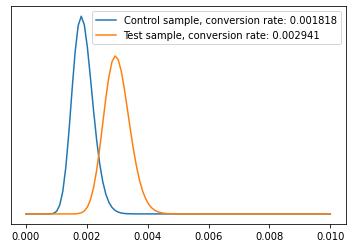

In [24]:
def calc_beta_mode(a, b):
    return (a - 1) / (a + b - 2)

def plot(betas, names, linf=0, lsup=0.01):
    x = np.linspace(linf, lsup, 100)
    for f, name in zip(betas, names):
        y = f.pdf(x)
        y_mode = calc_beta_mode(f.args[0], f.args[1])
        y_var = f.var()
        plt.plot(x, y, label=f"{name} sample, conversion rate: {y_mode:.6f}")
        plt.yticks([])
    plt.legend()
    plt.show()

plot([beta_C, beta_T], names=["Control", "Test"])

<font size=4>
    Plot joint distribution for control and test conversions.
</font>

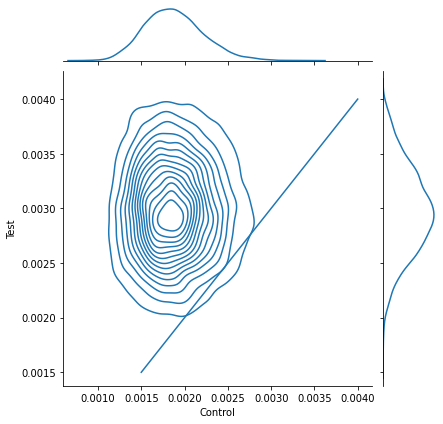

In [26]:
val_C = np.random.beta(a_C, b_C, 10000)
val_T = np.random.beta(a_T, b_T, 10000)
vals = np.vstack([val_C, val_T]).T

limit = 0.004

df = pd.DataFrame(vals, columns=['Control', 'Test'])
df = df[df['Control'] < limit]
df = df[df['Test'] < limit]

g = sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.0015, limit], [0.0015, limit])

In [29]:
from calc_prob import calc_prob_between

prob = calc_prob_between(beta_T, beta_C)
print(f'Probability of one-sided inequality: {prob}')

Probability of one-sided inequality: 0.9821319709016084
